# Machine Learning using Python

Machine Learning is a field that is at the forefront of computing today. In fact, it is omnipresent in the computing world! Even if you’ve never heard of Machine Learning before, you use it many times  (in a day!) without probably even realizing it! You make a Google search. There’s Machine Learning running in the background which ranks the results (so that you see the most relevant results first). You log in to your email account. It is Machine Learning that determines which emails should appear in your inbox and which ones in your spam folder.

Did you know? Machine Learning, or ML for short, is being used today to make driver-less cars, predict emergency room waiting times, identify whales in oceans based on audio recordings (so that ships can avoid hitting them), and make intelligent recommendations on which movie one should watch next on services such as Netflix.

### Machine Leaning libraries in Python
* Tensorflow
* scikit-learn
* Theano
* Pylearn2
* Pyevolve
* NuPIC
* Pattern
* Caffe

Other libraries
* Nilearn
* Statsmodels
* PyBrain (inactive)
* Fuel
* Bob
* skdata
* MILK
* IEPY
* Quepy
* Hebel
* mlxtend
* nolearn
* Ramp
* Feature Forge
* REP
* Python-ELM
* PythonXY
* XCS
* PyML
* MLPY (inactive)
* Orange
* Monte
* PYMVPA
* MDP (inactive)
* Shogun
* PyMC
* Gensim
* Neurolab
* FFnet (inactive)
* LibSVM
* Spearmint
* Chainer
* topik
* Crab
* CoverTree
* breze
* deap
* neurolab
* Spearmint
* yahmm
* pydeep
* Annoy
* neon
* sentiment

![caption](Steps-to-Predictive-Modelling.jpg)

Image source: https://upxacademy.com/introduction-machine-learning/

In [1]:
import numpy as np
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
from sklearn import svm
import warnings
import matplotlib.pyplot as plt

# To display plots inside notebook
%matplotlib inline

warnings.filterwarnings('ignore')

# notebook parameters
pd.set_option('display.max_rows', 15)

# GET DATA

### Data Handling
#### Let's read our data in using pandas:

In [2]:
df = pd.read_csv(r"data/train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### To view the columns individually

In [5]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
                             ...                        
884                               Sutehall, Mr. Henry Jr
885                 Rice, Mrs. William (Margaret Norton)
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, dtype: object

#### To find the occurence of each object

In [6]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

# CLEAN, PREPARE, AND MANIPULATE DATA

In [8]:
df.apply(lambda x: sum(x.isnull()), axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.apply(lambda x: sum(x.notnull()), axis=0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

#### To drop the column that is not required

In [10]:
df.drop(['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q


In [11]:
df = df.drop(['Cabin'], axis=1)
# df.drop(['Cabin'], axis=1, inplace=True)

In [12]:
# Remove NaN values
df = df.dropna()
# df.dropna(inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Now let's check for the 'notnull' values

In [14]:
df.apply(lambda x: sum(x.notnull()), axis=0)

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
dtype: int64

### Visualize our data graphically:

#### plot a bar graph of those who surived vs those who did not

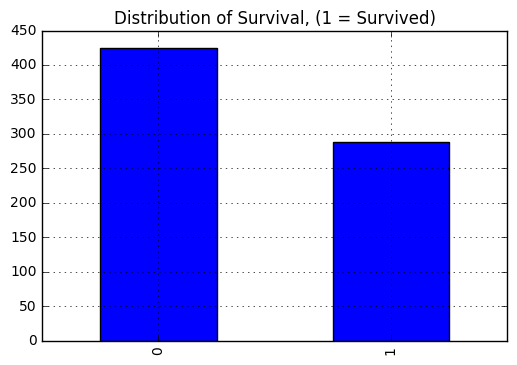

In [15]:
df['Survived'].value_counts().plot(kind='bar')
plt.title("Distribution of Survival, (1 = Survived)")
plt.grid(True)

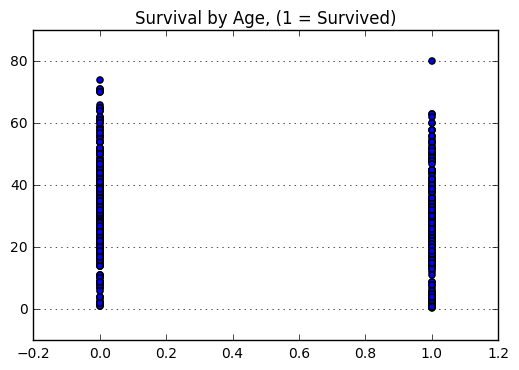

In [16]:
plt.scatter(df['Survived'], df['Age'])
plt.title("Survival by Age, (1 = Survived)")
plt.grid(True, axis='y')

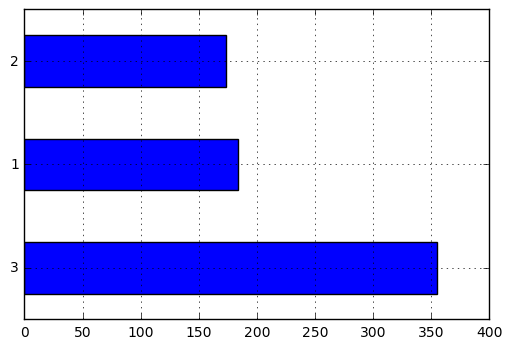

In [17]:
df['Pclass'].value_counts().plot(kind="barh")
plt.grid(True)

#### Checking for 'class 1' passengers

In [18]:
df['Pclass'] == 1

0      False
1       True
2      False
3       True
4      False
6       True
7      False
       ...  
883    False
884    False
885    False
886    False
887     True
889     True
890    False
Name: Pclass, dtype: bool

#### Passing the 'class 1' passengers list to 'Age' --> To find out the age of 'class 1' passenges

In [19]:
df['Age'][df['Pclass'] == 1]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
27     19.0
30     40.0
       ... 
862    48.0
867    31.0
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, dtype: float64

In [20]:
len(df['Age'][df['Pclass'] == 1])

184

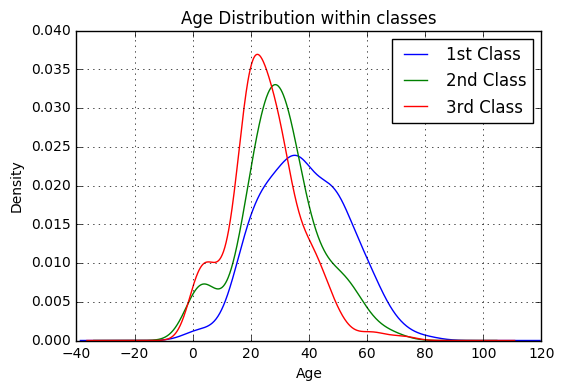

In [21]:
df['Age'][df['Pclass'] == 1].plot(kind='kde')    
df['Age'][df['Pclass'] == 2].plot(kind='kde')
df['Age'][df['Pclass'] == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.grid(True)

### Exploratory Visualization:
The point of this tutorial is to predict if an individual will survive based on the features in the data like:

* Traveling Class (called pclass in the data)
* Sex
* Age
* Fare Price

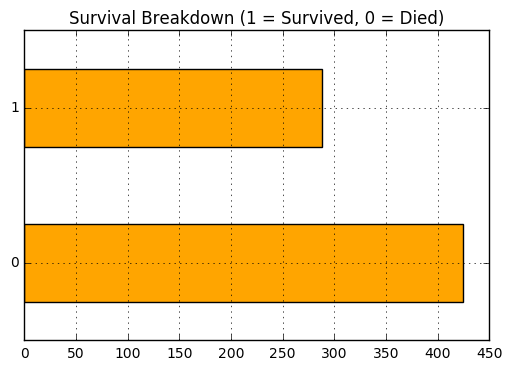

In [22]:
df['Survived'].value_counts().plot(kind='barh', color="orange") 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")
plt.grid(True)

#### Find out the count of total male and female survived, in ascending order

In [23]:
df['Survived'][df['Sex'] == 'male'].value_counts()

0    360
1     93
Name: Survived, dtype: int64

In [24]:
df['Survived'][df['Sex'] == 'female'].value_counts()

1    195
0     64
Name: Survived, dtype: int64

In [25]:
df_male = df['Survived'][df['Sex'] == 'male'].value_counts().sort_index()
df_female = df['Survived'][df['Sex'] == 'female'].value_counts().sort_index()

In [26]:
df_male

0    360
1     93
Name: Survived, dtype: int64

In [27]:
df_female

0     64
1    195
Name: Survived, dtype: int64

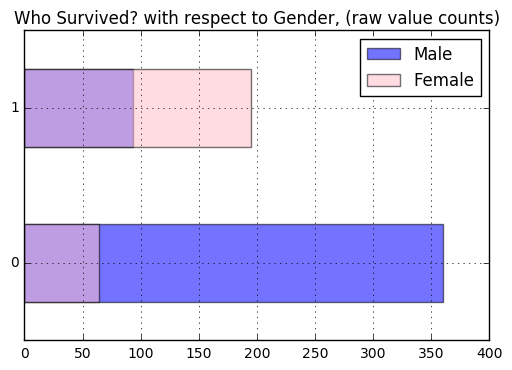

In [28]:
df_male.plot(kind='barh', color='blue', label='Male', alpha=0.55)
df_female.plot(kind='barh', color='pink', label='Female', alpha=0.55)
plt.grid(True)
plt.legend(loc='best')
plt.title("Who Survived? with respect to Gender, (raw value counts)")

#### Now let's find out the ratio of survived people

In [29]:
df_male.sum()

453L

In [30]:
df_female.sum()

259L

In [31]:
df_male/float(df_male.sum())

0    0.794702
1    0.205298
Name: Survived, dtype: float64

In [32]:
df_female/float(df_female.sum())

0    0.247104
1    0.752896
Name: Survived, dtype: float64

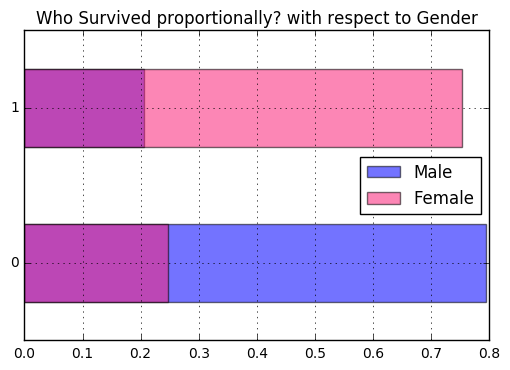

In [33]:
(df_male/float(df_male.sum())).plot(kind='barh', label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379', label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender")
plt.grid(True)
plt.legend(loc='best')

#### Let's try going some more deeper, by finding out the the passenger class wise survival

In [34]:
female_highclass = df['Survived'][(df['Pclass'] != 3) & (df['Sex'] == 'female')].value_counts()
female_lowclass = df['Survived'][(df['Pclass'] == 3) & (df['Sex'] == 'female')].value_counts()
male_highclass = df['Survived'][(df['Pclass'] != 3) & (df['Sex'] == 'male')].value_counts()
male_lowclass = df['Survived'][(df['Pclass'] == 3) & (df['Sex'] == 'male')].value_counts()

In [35]:
female_highclass

1    148
0      9
Name: Survived, dtype: int64

In [36]:
female_lowclass

0    55
1    47
Name: Survived, dtype: int64

In [37]:
male_highclass

0    145
1     55
Name: Survived, dtype: int64

In [38]:
male_lowclass

0    215
1     38
Name: Survived, dtype: int64

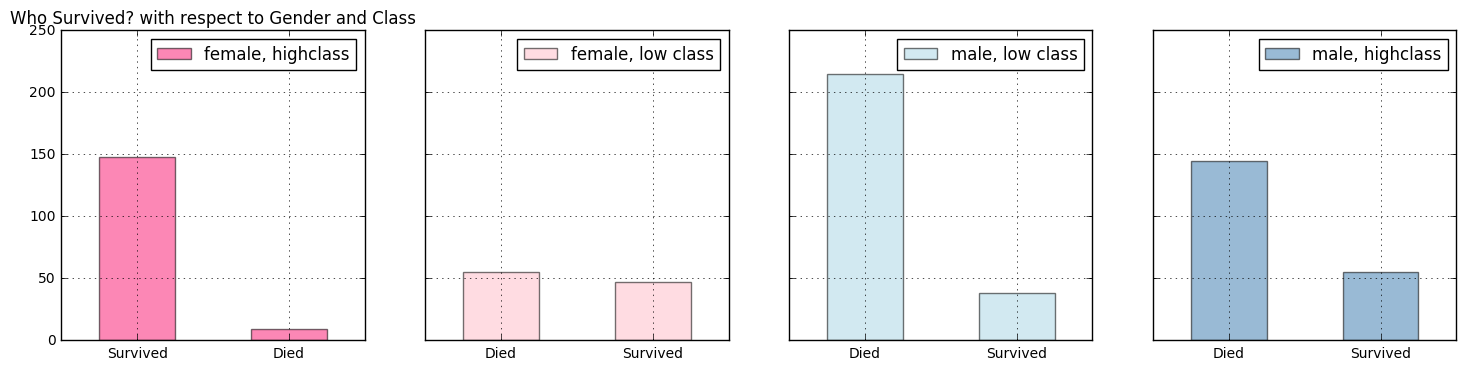

In [39]:
# figure parameters
fig = plt.figure(figsize=(18,4), dpi=1600)

# Making subplots
# # equivalent but more general
# fig.add_subplot(1,1,1)
    
# # add subplot with red background
# fig.add_subplot(212, axisbg='r')

# 141 represents the following:
# 1 --> no of rows
# 4 --> no of columns
# 1 --> plot number
ax1 = fig.add_subplot(141)
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=0.55)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
plt.title("Who Survived? with respect to Gender and Class")
plt.legend(loc='best')
plt.grid(True)

# 'sharey' --> shares the y axis with the mentioned axis
# now ax2 shares the y axis of ax1
ax2 = fig.add_subplot(142, sharey=ax1)
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=0.55)
ax2.set_xticklabels(["Died", "Survived"], rotation=0)
plt.legend(loc='best')
plt.grid(True)

ax3 = fig.add_subplot(143, sharey=ax1)
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=0.55)
ax3.set_xticklabels(["Died", "Survived"], rotation=0)
plt.legend(loc='best')
plt.grid(True)

ax4 = fig.add_subplot(144, sharey=ax1)
male_highclass.plot(kind='bar', label='male, highclass', color='steelblue', alpha=0.55)
ax4.set_xticklabels(["Died", "Survived"], rotation=0)
plt.legend(loc='best')
plt.grid(True)

In [40]:
df['Survived'][df.Sex == 'male'].value_counts().sort_index()

0    360
1     93
Name: Survived, dtype: int64

In [41]:
df['Survived'][df.Sex == 'female'].value_counts()

1    195
0     64
Name: Survived, dtype: int64

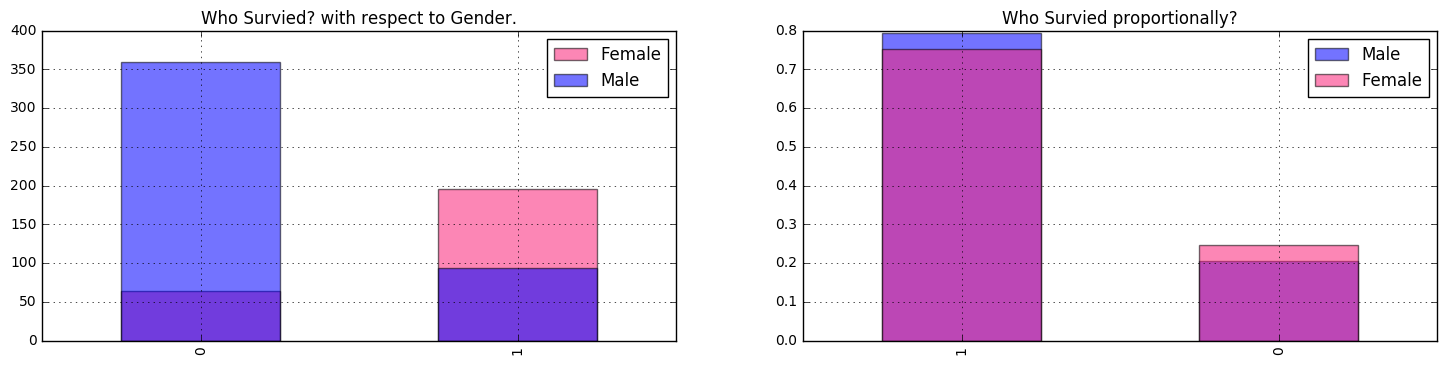

In [42]:
fig = plt.figure(figsize=(18,4), dpi=1600)

ax1 = fig.add_subplot(121)
df['Survived'][df.Sex == 'female'].value_counts().sort_index().plot(kind='bar', color='#FA2379', label='Female', alpha=0.55)
df['Survived'][df.Sex == 'male'].value_counts().sort_index().plot(kind='bar', label='Male', alpha=0.55)
plt.title("Who Survied? with respect to Gender.")
plt.legend(loc='best')
plt.grid(True)

ax2 = fig.add_subplot(122)
(df['Survived'][df['Sex'] == 'male'].value_counts()/float(df['Sex'][df['Sex'] == 'male'].size)).plot(kind='bar', label='Male', alpha=0.55)
(df['Survived'][df['Sex'] == 'female'].value_counts()/float(df['Sex'][df['Sex'] == 'female'].size)).plot(kind='bar', color='#FA2379', label='Female', alpha=0.55)
plt.title("Who Survied proportionally?")
plt.legend(loc='best')
plt.grid(True)

# TRAIN MODEL

#### Let's just create a formule for our model

In [43]:
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)'

####  'dmatrices' is used to used to create regression friendly dataframe

In [44]:
y, X = dmatrices(formula, data=df, return_type='dataframe')
# instantiate our model
model = sm.Logit(y, X)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
result = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Fri, 03 Feb 2017   Pseudo R-squ.:                  0.3414
Time:                        00:49:34   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000         3.613     5.471
C(Pclass)[T.2]      -1.2673      0.299     -4.245      0.000        -1.852    -0.682
C(Pclass)[T.3]      -2.4966      0.296     -8.422      0.000        -3.078    -1.916
C(Sex)[T.male]      -2.6239      0.218    -12.060      0.000        -3.050    -2.197
C(Embarked)[T.Q]    -0.8351      0.597     -1.398      0.162        -2.006     0.335
C(Embarked)[T.S]    -0.4254      0.271     -1.572      0.116        -0.956     0.105
Age                 -0.0436      0.008     -5.264      0.000        -0.060    -0.027
SibSp               -0.3697      0.123     -3.004      0.003        -0.611    -0.129
====================================================================================
"""

#### Let's try to do something with machine learning

In [45]:
# Create our machine learning formula
formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

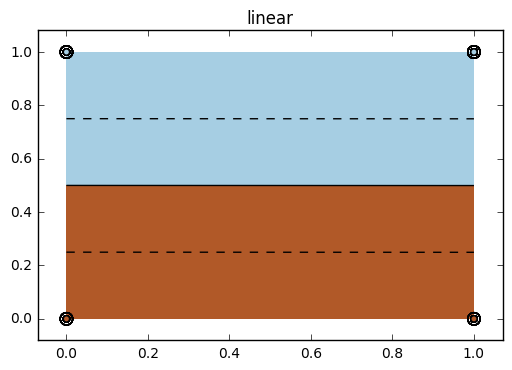

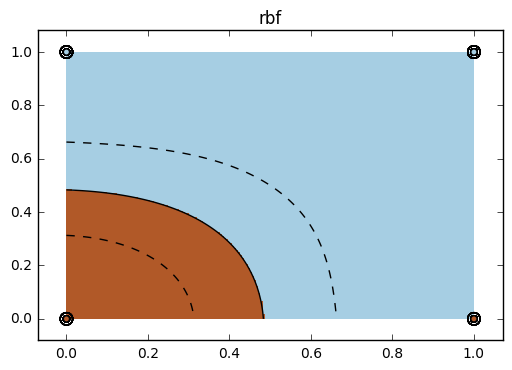

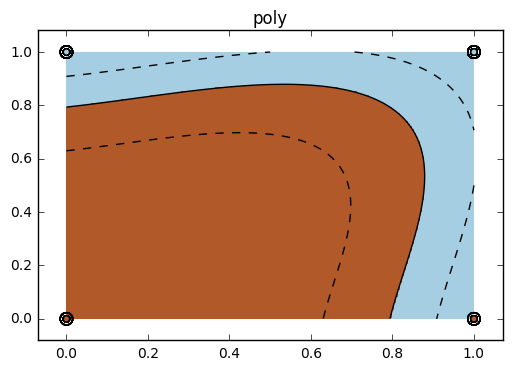

In [46]:
# set plotting parameters
plt.figure(figsize=(8,6))

# create a regression friendly data frame
y, x = dmatrices(formula_ml, data=df, return_type='matrix')

# select which features we would like to analyze
# try chaning the selection here for diffrent output.
# Choose : [2,3] - pretty sweet DBs [3,1] --standard DBs [7,3] -very cool DBs,
# [3,6] -- very long complex dbs, could take over an hour to calculate! 
feature_1 = 2
feature_2 = 3

X = np.asarray(x)
X = X[:,[feature_1, feature_2]]  


y = np.asarray(y)
# needs to be 1 dimenstional so we flatten. it comes out of dmatirces with a shape. 
y = y.flatten()      

n_sample = len(X)

# will give a shuffled set of unique random integers of given range
np.random.seed(0)
order = np.random.permutation(n_sample)

X = X[order]
y = y[order].astype(np.float)

# do a cross validation
nighty_precent_of_sample = int(.9 * n_sample)
X_train = X[:nighty_precent_of_sample]
y_train = y[:nighty_precent_of_sample]
X_test = X[nighty_precent_of_sample:]
y_test = y[nighty_precent_of_sample:]

# create a list of the types of kerneks we will use for your analysis
types_of_kernels = ['linear', 'rbf', 'poly']

# specify our color map for plotting the results
color_map = plt.cm.Paired
# color_map = plt.cm.coolwarm

# fit the model
for fig_num, kernel in enumerate(types_of_kernels):
    clf = svm.SVC(kernel=kernel, gamma=3)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=color_map)

    # circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)
    
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=color_map)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
               levels=[-.5, 0, .5])

    plt.title(kernel)
    plt.show()

In [47]:
clf = svm.SVC(kernel='poly', gamma=3).fit(X_train, y_train)

# TEST MODEL

In [48]:
clf.score(X_test, y_test)

0.81944444444444442

### Predict results

In [49]:
clf.predict(np.array([0, 1]))

array([ 0.])